In [175]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [176]:
# Read data into a dataframe
lasvegas = pd.read_excel("/content/vegastripadvisor.xlsx")
lasvegas

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday


| Field              | Description                                            | Data Type  |
|--------------------|--------------------------------------------------------|------------|
| User country       | Country of the user who provided the review             | Categorical|
| Nr. reviews        | Total number of reviews                                | Numeric    |
| Nr. hotel reviews  | Number of reviews specifically for hotels               | Numeric    |
| Helpful votes      | Count of helpful votes received on the review           | Numeric    |
| Score              | Rating or score given in the review                     | Numeric    |
| Period of stay     | Time period during which the user stayed at the hotel   | Categorical|
| Traveler type      | Type of traveler (e.g., solo, family, couple)           | Categorical|
| Pool               | Presence of a pool at the hotel                         | Binary     |
| Gym                | Presence of a gym at the hotel                          | Binary     |
| Tennis court       | Presence of a tennis court at the hotel                 | Binary     |
| Spa                | Presence of a spa at the hotel                          | Binary     |
| Casino             | Presence of a casino at the hotel                       | Binary     |
| Free internet      | Availability of free internet at the hotel              | Binary     |
| Hotel name         | Name of the reviewed hotel                              | Categorical|
| Hotel stars        | Rating in stars given to the hotel                      | Numeric    |
| Nr. rooms          | Total number of rooms in the hotel                      | Numeric    |
| User continent     | Continent of the user                                   | Categorical|
| Member years       | Number of years the user has been a member              | Numeric    |
| Review month       | Month in which the review was provided                  | Categorical|
| Review weekday     | Day of the week when the review was provided            | Categorical|

In [177]:
lasvegas.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Pool                 object
Gym                  object
Tennis court         object
Spa                  object
Casino               object
Free internet        object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

In [178]:
# Encode Review weekday into Weekend vs Weekday
# Define a function to categorize days
def categorize_day(day):
    if day in ['Friday', 'Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the function to create a new column 'DayCategory'
lasvegas['Review DayCategory'] = lasvegas['Review weekday'].apply(categorize_day)

In [179]:
# Encode categorical variables
lasvegas['Score'] = lasvegas['Score'].astype(int)

# Dummy coding
lasvegas = pd.get_dummies(lasvegas, columns=['Pool', 'Gym', 'Tennis court', 'Spa', 'Casino', 'Free internet', 'Period of stay', 'Traveler type', 'User continent', 'Review month', 'Review DayCategory'], drop_first=True)

lasvegas['Hotel stars']=lasvegas['Hotel stars'].astype(str).replace(',', '.', regex=True).astype(float)

In [180]:
lasvegas=lasvegas.drop('Hotel name',axis=1)
lasvegas

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Review weekday,Pool_YES,...,Review month_February,Review month_January,Review month_July,Review month_June,Review month_March,Review month_May,Review month_November,Review month_October,Review month_September,Review DayCategory_Weekend
0,USA,11,4,13,5,3.0,3773,9,Thursday,0,...,0,1,0,0,0,0,0,0,0,0
1,USA,119,21,75,3,3.0,3773,3,Friday,0,...,0,1,0,0,0,0,0,0,0,1
2,USA,36,9,25,5,3.0,3773,2,Saturday,0,...,1,0,0,0,0,0,0,0,0,1
3,UK,14,7,14,4,3.0,3773,6,Friday,0,...,1,0,0,0,0,0,0,0,0,1
4,Canada,5,5,2,4,3.0,3773,7,Tuesday,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,4.0,826,1,Sunday,1,...,0,0,0,0,0,0,0,1,0,1
500,Canada,50,13,29,4,4.0,826,8,Thursday,1,...,0,0,0,0,0,0,1,0,0,0
501,USA,154,23,31,4,4.0,826,4,Thursday,1,...,0,0,0,0,0,0,1,0,0,0
502,USA,9,6,5,2,4.0,826,9,Wednesday,1,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-181-571d8479caea>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(lasvegas.corr(), cmap="YlGnBu", annot=True,)


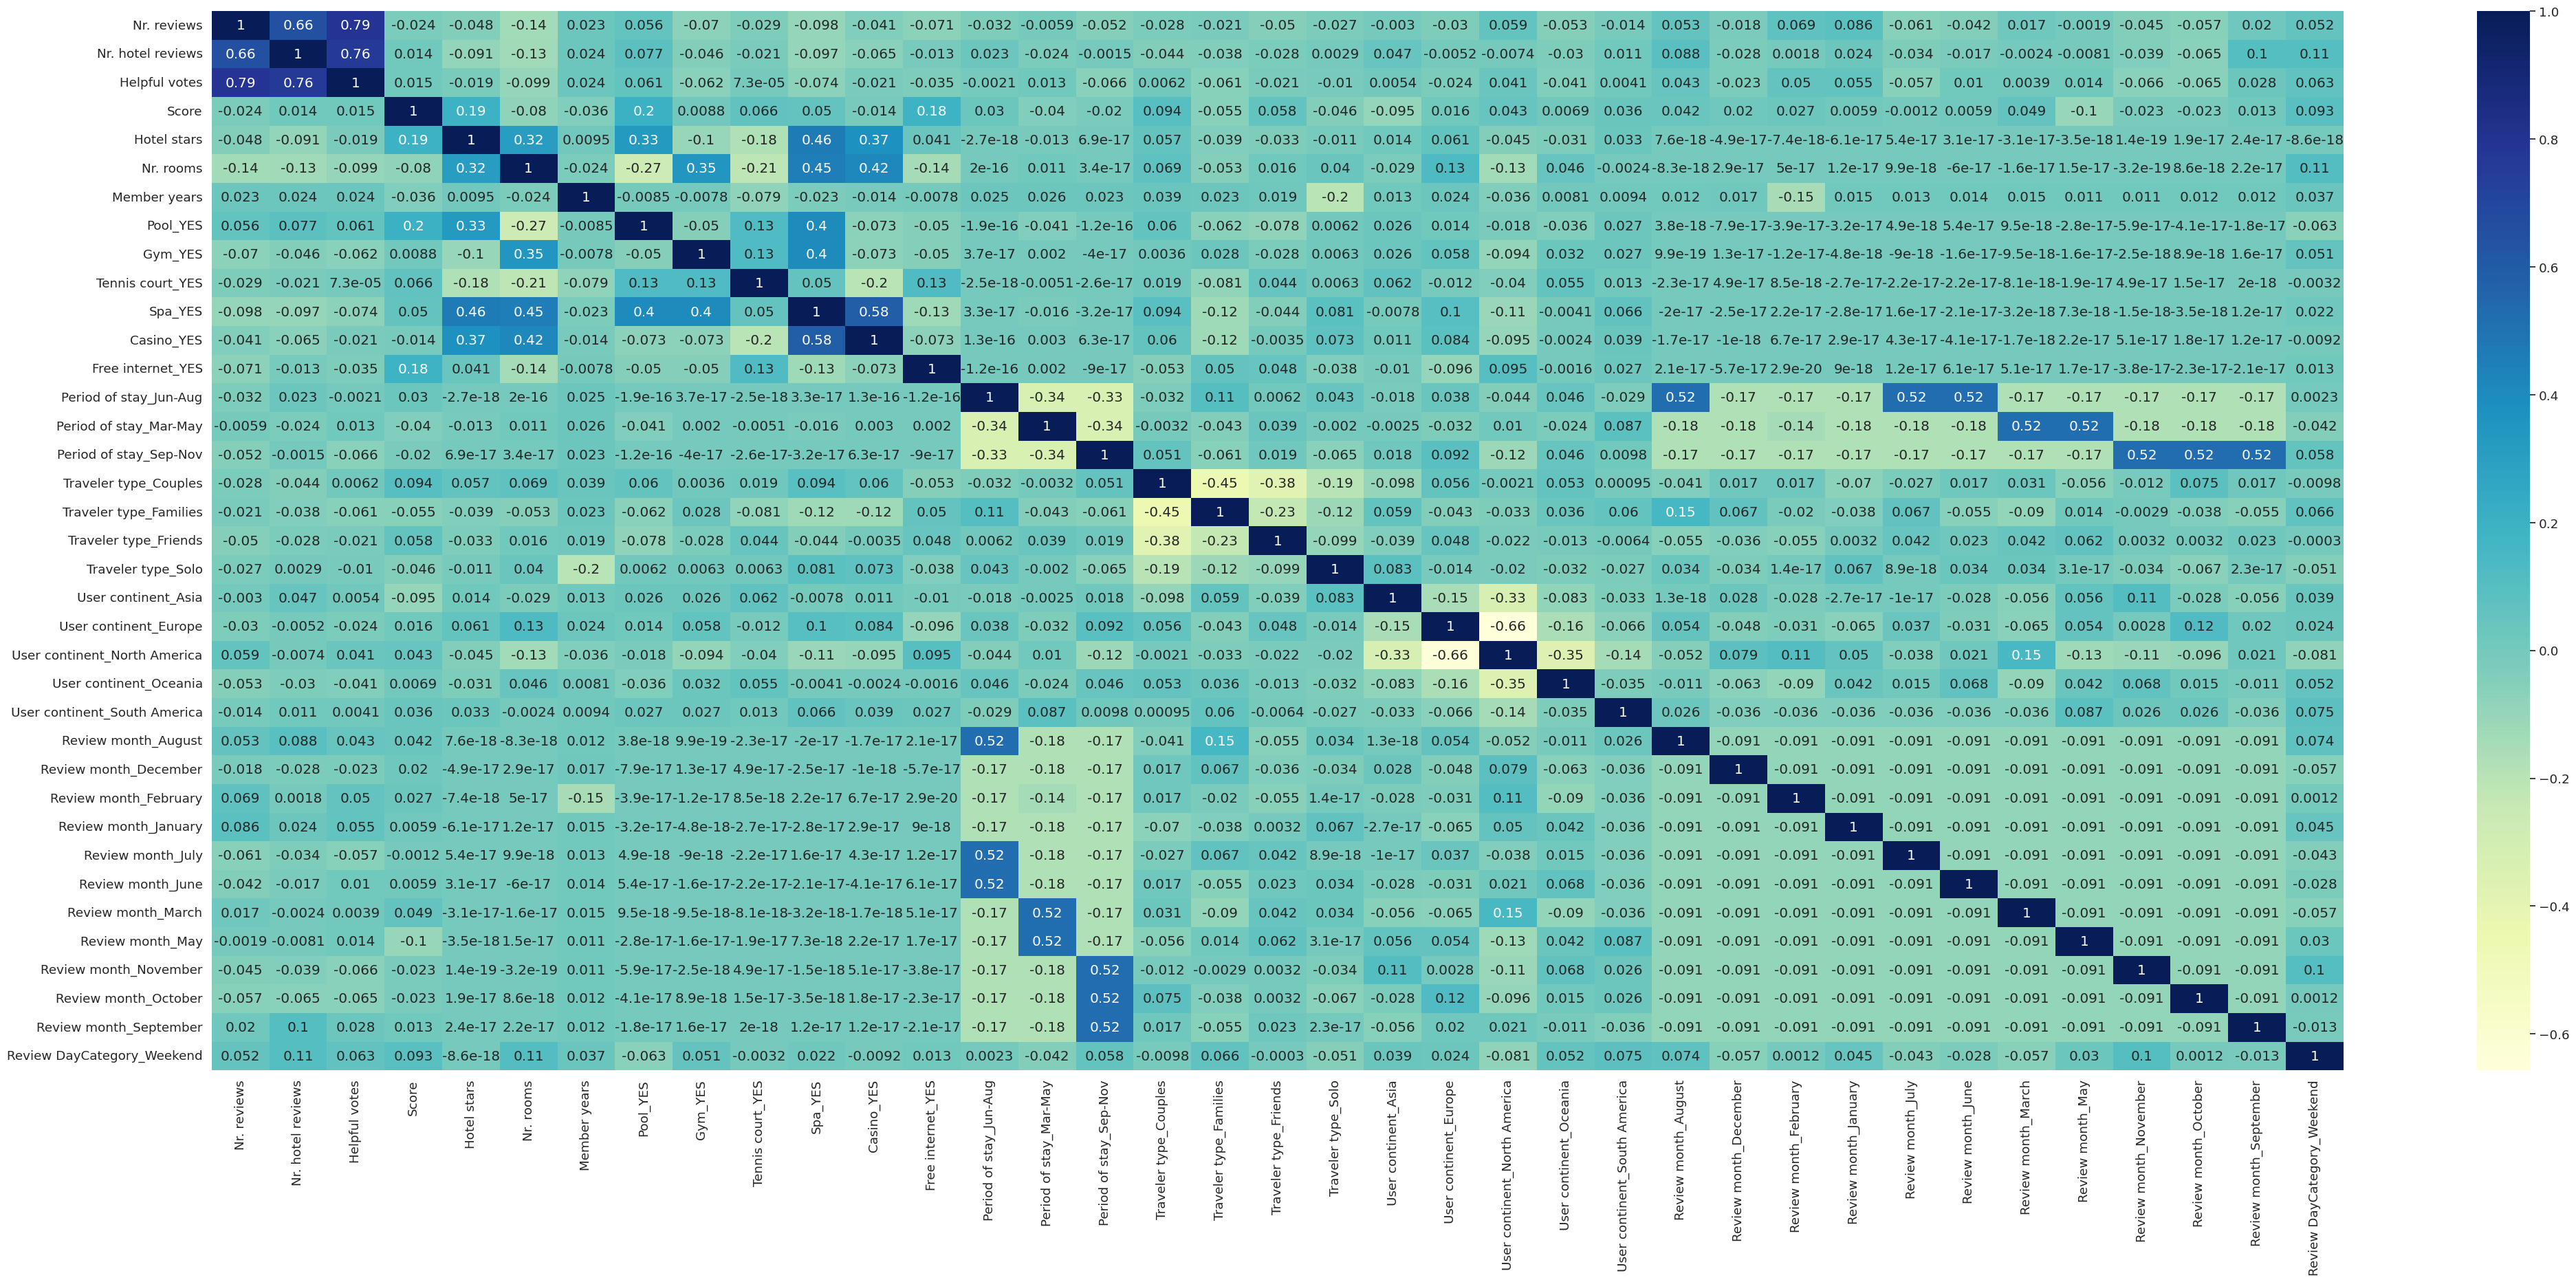

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(50, 20))
# plotting correlation heatmap
dataplot = sns.heatmap(lasvegas.corr(), cmap="YlGnBu", annot=True,)

sns.set(font_scale=1.2)
# displaying heatmap
plt.show()

NOTES:<br>
Solo Travelers From Asia<br>
- Negative correlation in Score --> Not meeting their needs?

In [182]:
lasvegas.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Review weekday,Pool_YES,...,Review month_February,Review month_January,Review month_July,Review month_June,Review month_March,Review month_May,Review month_November,Review month_October,Review month_September,Review DayCategory_Weekend
0,USA,11,4,13,5,3.0,3773,9,Thursday,0,...,0,1,0,0,0,0,0,0,0,0
1,USA,119,21,75,3,3.0,3773,3,Friday,0,...,0,1,0,0,0,0,0,0,0,1
2,USA,36,9,25,5,3.0,3773,2,Saturday,0,...,1,0,0,0,0,0,0,0,0,1
3,UK,14,7,14,4,3.0,3773,6,Friday,0,...,1,0,0,0,0,0,0,0,0,1
4,Canada,5,5,2,4,3.0,3773,7,Tuesday,0,...,0,0,0,0,1,0,0,0,0,0


In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler


lasvegas = pd.get_dummies(lasvegas, columns=['User country'], drop_first=True)



# Selecting features and the target variable
features = lasvegas.drop(['Score','Review weekday'], axis=1) # replace 'target_column' with your target column name
target = lasvegas['Score']



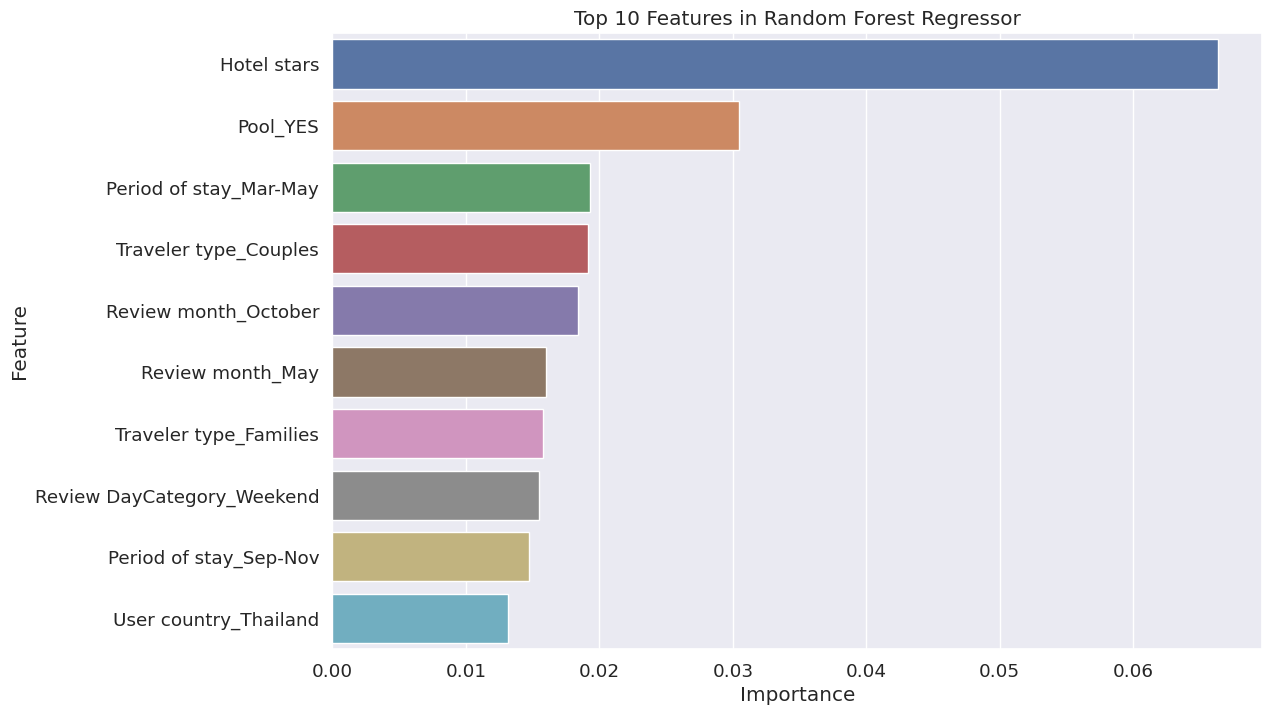

In [184]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Getting Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Creating a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.iloc[5:15,])
plt.title('Top 10 Features in Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [185]:
# Read data into a dataframe
highrev = pd.read_excel("/content/vegastripadvisor.xlsx")

highrev=highrev[highrev['Score'] == 5]

# Encode categorical variables
highrev['Score'] = highrev['Score'].astype(int)

# highrev=highrev.loc[:, ['Pool', 'Gym','Tennis court','Spa','Casino', 'Free internet','Score']]



highrev.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
26,Canada,30,12,17,5,Dec-Feb,Couples,YES,YES,NO,YES,YES,YES,Excalibur Hotel & Casino,3,3981,North America,8,February,Friday
28,USA,26,10,28,5,Mar-May,Solo,YES,YES,NO,YES,YES,YES,Excalibur Hotel & Casino,3,3981,North America,1,March,Wednesday
29,Ireland,8,7,9,5,Mar-May,Couples,YES,YES,NO,YES,YES,YES,Excalibur Hotel & Casino,3,3981,Europe,8,March,Wednesday


In [186]:
# Apply the function to create a new column 'DayCategory'
highrev['Review DayCategory'] = highrev['Review weekday'].apply(categorize_day)

In [187]:
# Encode categorical variables
highrev['Score'] = highrev['Score'].astype(int)

# Dummy coding
highrev = pd.get_dummies(highrev, columns=['Pool', 'Gym', 'Tennis court', 'Spa', 'Casino', 'Free internet', 'Period of stay', 'Traveler type', 'User continent', 'Review month', 'Review DayCategory'], drop_first=True)

highrev['Hotel stars']=highrev['Hotel stars'].astype(str).replace(',', '.', regex=True).astype(float)

<ipython-input-188-6bc8dcf15365>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(highrev.corr(), cmap="YlGnBu", annot=True,)


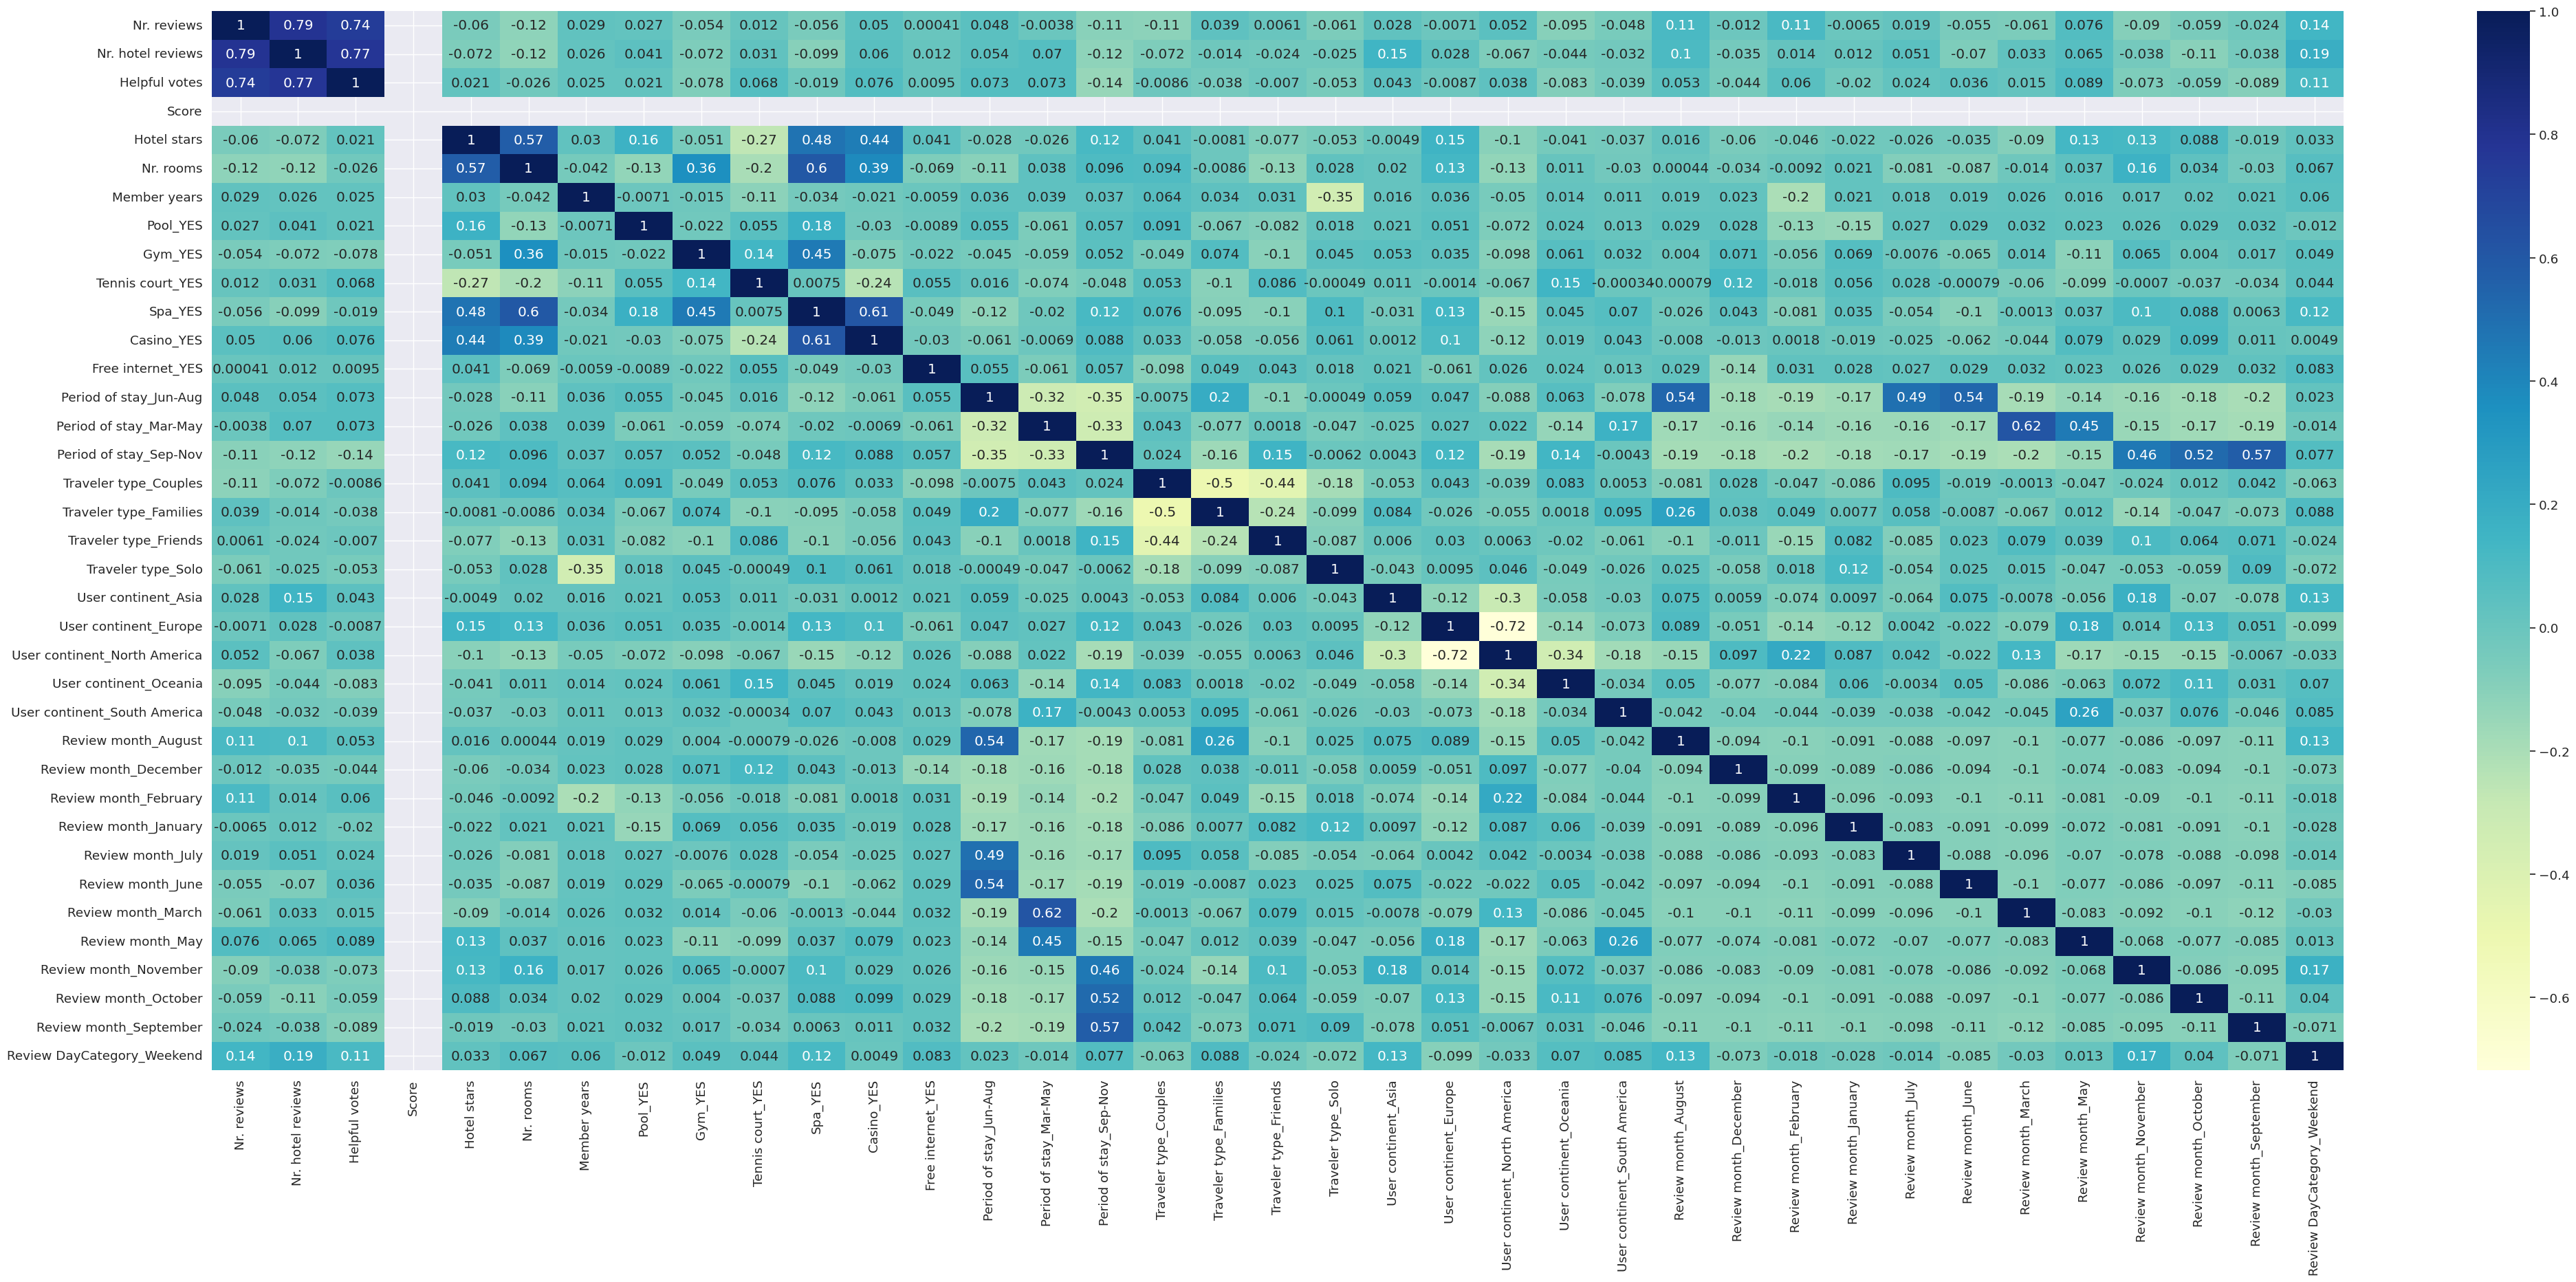

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(50, 20))
# plotting correlation heatmap
dataplot = sns.heatmap(highrev.corr(), cmap="YlGnBu", annot=True,)

sns.set(font_scale=1.2)
# displaying heatmap
plt.show()